# Final Project

Welcome to the final practical project for our course on [Data Science Bootcamp](https://open.hpi.de/courses/datascience2023). Throughout this project, you will go through the entire data science process, starting from data loading and cleaning, all the way to running a model and making predictions. This hands-on project will provide you with valuable experience and allow you to apply the concepts and techniques you've learned in the course. Get ready to dive into real-world data analysis and build your skills as a data scientist!


## Important Remarks:

 - The ultimate goal of this project is to conduct comprehensive data analysis and build 2 models using the provided datasets.
 - Code is not the only thing graded here. Well-written and understandable documentation of your code is to be expected
 - Clear reasoning behind your choices in every step of the notebook is important. Be it the choice of a data cleaning technique or selecting certain features in your analysis or the choice of your 2 models.

# Importing packages


In [1]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset into data


In [2]:
# Load the dataset
df = pd.read_csv('supermarket_survey.csv', sep=';', header=0)

# Dataset overview and statistical summary


In [3]:
#get information about datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   randomInt                353 non-null    int64  
 1   age                      345 non-null    object 
 2   gender                   347 non-null    object 
 3   district                 334 non-null    object 
 4   modeOfTransportation     341 non-null    object 
 5   distance                 338 non-null    object 
 6   G03Q13amountOfPeople     345 non-null    object 
 7   income                   331 non-null    float64
 8   frequency                339 non-null    object 
 9   days[1]                  353 non-null    object 
 10  days[2]                  353 non-null    object 
 11  days[3]                  353 non-null    object 
 12  days[4]                  353 non-null    object 
 13  days[5]                  353 non-null    object 
 14  days[6]                  3

In [4]:
#disply 100 colunms
df.head(100)

,randomInt,age,gender,district,modeOfTransportation,distance,G03Q13amountOfPeople,income,frequency,days[1],...,satisGlutenfreeProducts,satisAnimalProducts,ideasExtendedBusiness,ideasHelpCarry,ideasCustomerCouncil,ideasFreeWifi,ideasTouchDisplay,ideasSelfCheckout,ideasBikeParking,ideasUndergroundParking
0,4,NaN,Male,Godham,Own Car,1-2km,3,120000.0,Twice,No,...,8.0,7.0,2.0,4.0,3.0,4.0,NaN,4.0,NaN,NaN
1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,20-25,Female,Springtown,Own Car,>7km,2,15.0,Three times,No,...,7.0,NaN,7.0,7.0,7.0,7.0,NaN,7.0,7.0,7.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,1337.0,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,15-20,Male,Piltunder,Own Car,1-2km,4,250000.0,Twice,No,...,8.0,1.0,9.0,2.0,1.0,10.0,10.0,10.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3,55-60,Male,NaN,Own Car,3-5km,5 or more,3500.0,Twice,No,...,NaN,8.0,9.0,8.0,8.0,NaN,NaN,8.0,8.0,NaN
96,2,60-65,Male,Godham,Walking,500 meters to 1km,2,200.0,Once,No,...,6.0,9.0,8.0,10.0,10.0,10.0,10.0,10.0,10.0,7.0
97,4,>75,Male,Duckborg,Own Car,5-7km,2,200000.0,Once,No,...,NaN,9.0,10.0,5.0,1.0,1.0,2.0,10.0,1.0,1.0
98,4,45-50,Female,NaN,NaN,1-2km,3,4000.0,Once,Yes,...,NaN,9.0,NaN,1.0,1.0,5.0,7.0,10.0,NaN,NaN


In [5]:
#statistical summary of the numerical columns in the DataFrame. 
#which calculate various descriptive statistics, such as count, mean, standard deviation, minimum, quartiles, and maximum, for each numerical column.
df.describe()

,randomInt,income,satisGeneralStore,satisMusic,satisQualityProducts,satisGeneralAssortment,satisVeganProducts,satisOrganicProducts,satisGlutenfreeProducts,satisAnimalProducts,ideasExtendedBusiness,ideasHelpCarry,ideasCustomerCouncil,ideasFreeWifi,ideasTouchDisplay,ideasSelfCheckout,ideasBikeParking,ideasUndergroundParking
count,353.000000,331.000000,332.000000,288.000000,329.000000,330.000000,274.000000,301.000000,209.000000,307.000000,324.000000,322.000000,318.000000,324.000000,320.000000,323.000000,312.000000,300.000000
mean,2.609065,66275.568882,7.424699,5.236111,7.498480,7.278788,6.350365,6.767442,6.315789,7.348534,6.919753,3.711180,3.232704,6.410494,5.571875,7.857585,7.602564,5.396667
std,1.105322,132542.950482,1.705790,2.507094,1.479792,1.674366,2.177444,1.981347,2.269317,1.902618,3.129760,3.027465,2.668179,3.147757,3.197936,2.668804,2.752793,3.321057
min,1.000000,-99932.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2290.000000,7.000000,3.000000,7.000000,7.000000,5.000000,6.000000,5.000000,6.500000,5.000000,1.000000,1.000000,4.000000,3.000000,7.000000,6.000000,2.000000
50%,3.000000,21000.000000,8.000000,5.000000,8.000000,8.000000,7.000000,7.000000,6.000000,8.000000,8.000000,2.000000,2.000000,7.000000,6.000000,9.000000,8.000000,6.000000
75%,4.000000,80284.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000,9.000000,10.000000,6.000000,5.000000,9.000000,9.000000,10.000000,10.000000,8.000000
max,4.000000,999999.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [6]:
df.gender.value_counts()

Male                 232
Female                84
Prefer not to say     22
Diverse                9
Name: gender, dtype: int64

In [7]:
df.moneySpent.value_counts()

Between 25 and 50 USD     103
Between 50 and 75          58
Less than 25 USD           58
More than 125 USD          44
Between 75 and 100 USD     42
100 to 125 USD             33
Name: moneySpent, dtype: int64

In [8]:
df.orderingItems.value_counts()

…selecting them myself in the store.    250
… ordering online.                       84
Name: orderingItems, dtype: int64

In [9]:
df.orderingItems.value_counts()

…selecting them myself in the store.    250
… ordering online.                       84
Name: orderingItems, dtype: int64

In [10]:
df.satisQualityProducts.value_counts()

8.0     103
7.0      84
9.0      60
6.0      30
5.0      21
10.0     19
4.0       7
3.0       3
2.0       1
1.0       1
Name: satisQualityProducts, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='Count'>

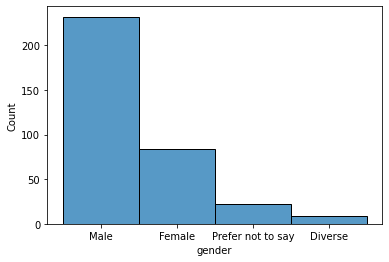

In [11]:
sns.histplot(x=df["gender"], bins=5)

<AxesSubplot:xlabel='satisQualityProducts', ylabel='Count'>

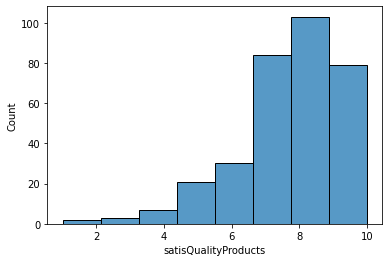

In [12]:
sns.histplot(x=df["satisQualityProducts"], bins=8)

<AxesSubplot:xlabel='income', ylabel='Count'>

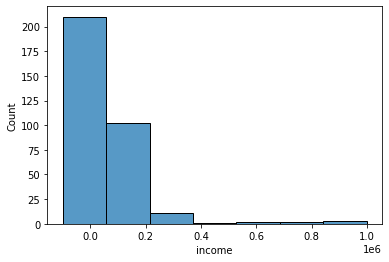

In [13]:
sns.histplot(x=df["income"], bins=7)

<AxesSubplot:xlabel='satisGeneralAssortment', ylabel='Count'>

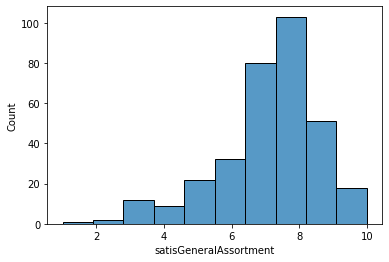

In [15]:
sns.histplot(data = df["satisGeneralAssortment"], bins=10)

In [57]:
# have overviow about income
df.income.describe()

count       331.000000
mean      66275.568882
std      132542.950482
min      -99932.000000
25%        2290.000000
50%       21000.000000
75%       80284.000000
max      999999.000000
Name: income, dtype: float64

In [58]:
#detectime missing income data
df.income.isna().sum()

22

In [59]:
# detect negative income
negative_income= df[df["income"]<0]
negative_income

,randomInt,age,gender,district,modeOfTransportation,distance,G03Q13amountOfPeople,income,frequency,days[1],...,satisGlutenfreeProducts,satisAnimalProducts,ideasExtendedBusiness,ideasHelpCarry,ideasCustomerCouncil,ideasFreeWifi,ideasTouchDisplay,ideasSelfCheckout,ideasBikeParking,ideasUndergroundParking
75,3,15-20,Prefer not to say,Metrapalis,Bicycle,500 meters to 1km,5 or more,-99932.0,NaN,No,...,10.0,9.0,1.0,1.0,1.0,10.0,10.0,10.0,10.0,1.0
190,3,20-25,Male,Godham,Bicycle,1-2km,1,-10000.0,More than four times,Yes,...,1.0,NaN,10.0,1.0,1.0,1.0,1.0,1.0,10.0,1.0


In [60]:
#detect users with income higher than 10000
montly_income= df[df["income"]<10000]
montly_income

,randomInt,age,gender,district,modeOfTransportation,distance,G03Q13amountOfPeople,income,frequency,days[1],...,satisGlutenfreeProducts,satisAnimalProducts,ideasExtendedBusiness,ideasHelpCarry,ideasCustomerCouncil,ideasFreeWifi,ideasTouchDisplay,ideasSelfCheckout,ideasBikeParking,ideasUndergroundParking
2,3,20-25,Female,Springtown,Own Car,>7km,2,15.0,Three times,No,...,7.0,NaN,7.0,7.0,7.0,7.0,NaN,7.0,7.0,7.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,1337.0,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3,20-25,Prefer not to say,Metrapalis,Walking,500 meters to 1km,1,500.0,Twice,No,...,10.0,10.0,9.0,1.0,1.0,9.0,9.0,10.0,1.0,1.0
6,2,60-65,Male,Godham,Own Car,1-2km,2,5000.0,Once,No,...,NaN,7.0,5.0,2.0,2.0,6.0,3.0,9.0,9.0,9.0
8,1,25-30,Male,Metrapalis,Walking,500 meters to 1km,1,600.0,Four times,Yes,...,6.0,8.0,10.0,2.0,3.0,4.0,3.0,10.0,10.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1,25-30,Male,Metrapalis,Public transportation,3-5km,1,1000.0,Twice,Yes,...,9.0,9.0,9.0,1.0,5.0,10.0,10.0,10.0,10.0,10.0
349,2,30-35,Male,Godham,Own Car,1-2km,3,50.0,Three times,No,...,5.0,7.0,9.0,8.0,8.0,8.0,8.0,9.0,9.0,10.0
350,3,20-25,Male,Godham,Walking,1-2km,2,5.5,Once,No,...,7.0,7.0,4.0,6.0,NaN,8.0,9.0,9.0,9.0,8.0
351,4,35-40,Male,Piltunder,Own Car,3-5km,4,600.0,Once,No,...,7.0,8.0,8.0,9.0,9.0,10.0,10.0,10.0,10.0,7.0


In [61]:
#keep just positive income
df= df[df["income"]>0]

In [62]:
df.income.describe()

count       327.000000
mean      67422.462691
std      132862.089848
min           3.000000
25%        2500.000000
50%       24000.000000
75%       82784.000000
max      999999.000000
Name: income, dtype: float64

<AxesSubplot:xlabel='preferCash', ylabel='Count'>

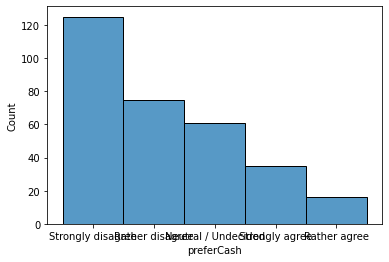

In [65]:
#Csh vs cashless
sns.histplot(df.preferCash)

In [66]:
#count user who prefer cash
df.preferCash.value_counts()

Strongly disagree      125
Rather disagree         75
Neutral / Undecided     61
Strongly agree          35
Rather agree            16
Name: preferCash, dtype: int64

In [67]:
#count user who not prefer cash
df.preferCashless.value_counts()

Strongly agree         171
Rather agree            52
Neutral / Undecided     48
Rather disagree         22
Strongly disagree       16
Name: preferCashless, dtype: int64

# Data cleaning

In [20]:
df = df.drop(['randomInt'], axis=1)
df = df.drop("willingPayDelivery", axis=1)
df = df.drop("distance", axis=1)

In [21]:
days_columns = ['time[1]', 'time[2]', 'time[3]', 'time[4]', 'time[5]']
df.drop(days_columns, axis=1, inplace=True)

In [22]:
days_columns = ['days[1]', 'days[2]', 'days[3]', 'days[4]', 'days[5]', 'days[6]', 'days[7]']
df.drop(days_columns, axis=1, inplace=True)

In [23]:
# Handline with missing values
columns_with_missing_values = ['age', 'gender', 'district', 'modeOfTransportation',
                               'G03Q13amountOfPeople', 'income', 'frequency', 'moneySpent', 
                               'orderingItems', 'deliveringItems', 'findProducts', 'usingDiscounts', 
                               'preferCash', 'preferCashless', 'isRelaxing', 'satisGeneralStore', 'satisMusic', 'satisQualityProducts', 'satisGeneralAssortment', 'satisVeganProducts', 'satisOrganicProducts', 'satisGlutenfreeProducts', 'satisAnimalProducts', 'ideasExtendedBusiness', 'ideasHelpCarry', 'ideasCustomerCouncil', 'ideasFreeWifi', 'ideasTouchDisplay', 'ideasSelfCheckout',
                               'ideasBikeParking', 'ideasUndergroundParking']

# Fill missing values with appropriate method
df[columns_with_missing_values] = df[columns_with_missing_values].fillna(df[columns_with_missing_values].mode().iloc[0])

# EDA

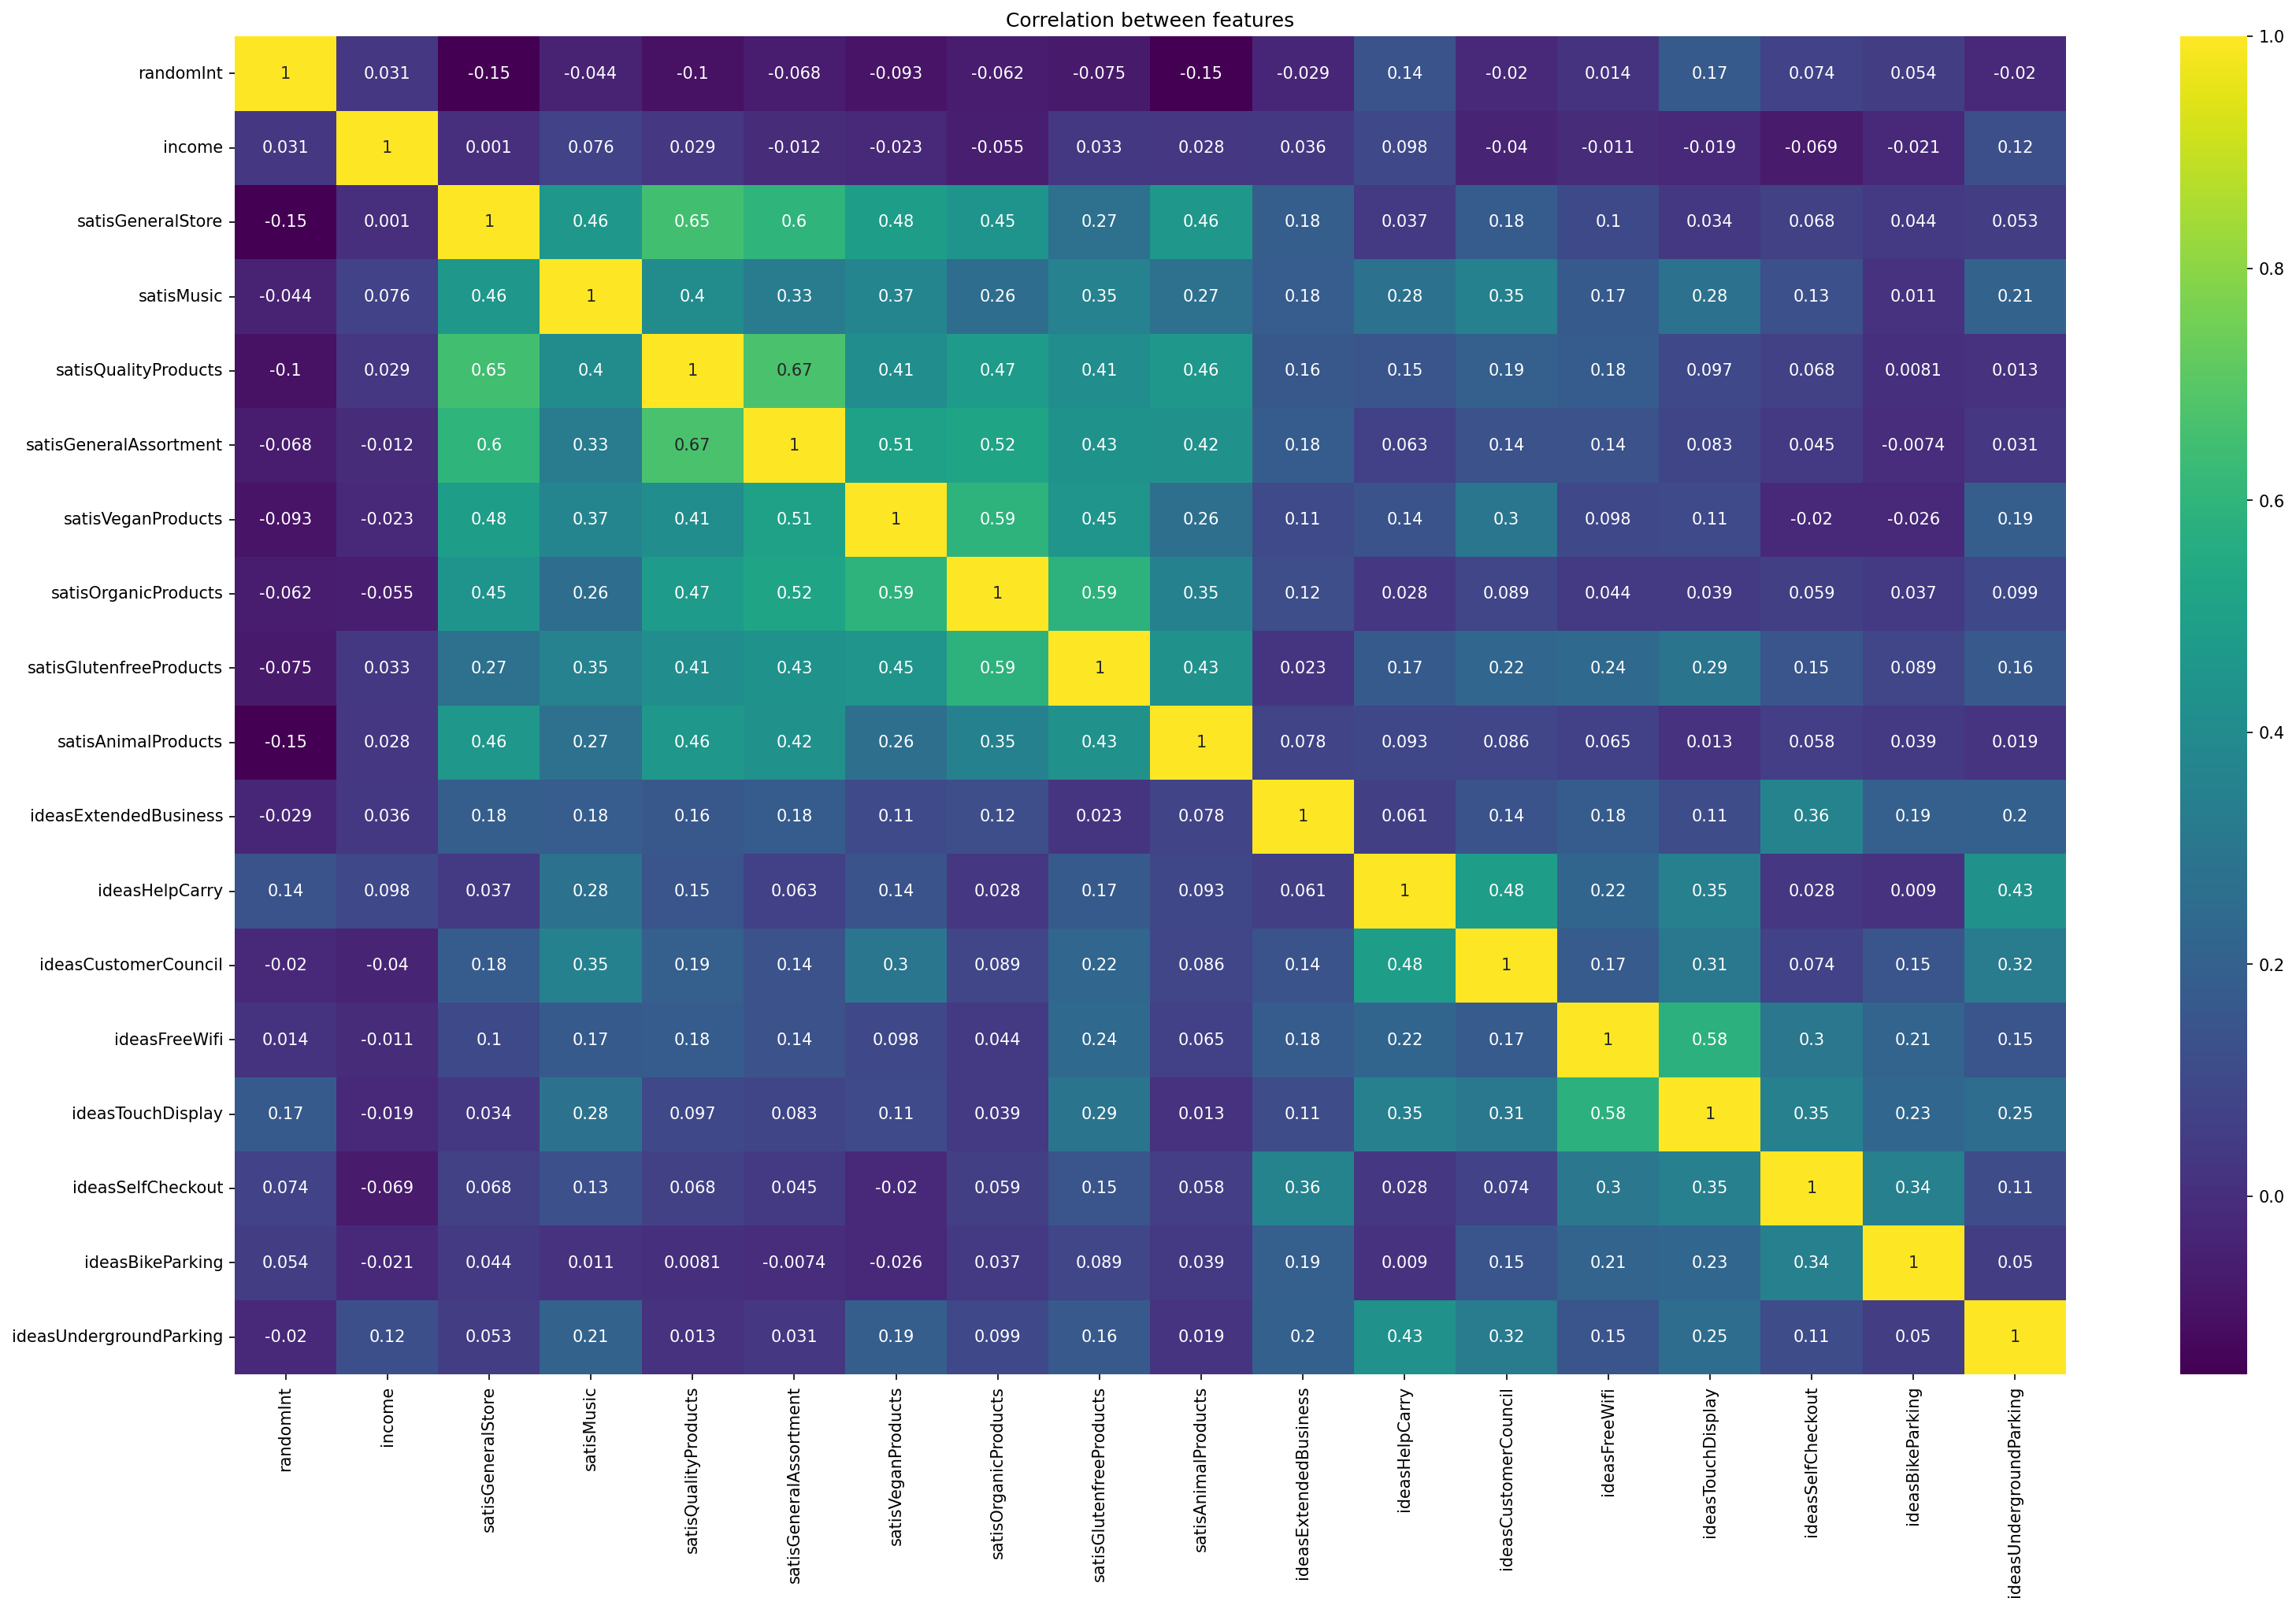

In [16]:
# Heatmap of the correlation of the features
plt.figure(figsize=(25,15),dpi=150)
sns.heatmap(df.corr(),cmap='viridis',annot=True)
plt.title('Correlation between features');

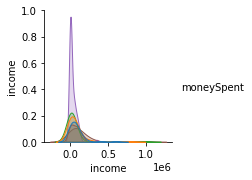

In [17]:
# understanding the relations between variables
data = df[['orderingItems', 'age', 'gender', 'income', 'frequency',
           'deliveringItems', 'findProducts', 'usingDiscounts',
           'preferCash', 'preferCashless']].copy()

data['moneySpent'] = df['moneySpent']

sns.pairplot(data, hue='moneySpent')
plt.show()

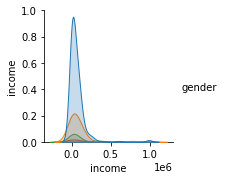

In [19]:
# understanding the relations between variables
data = df[['orderingItems', 'age', 'moneySpent', 'income', 'frequency',
           'deliveringItems', 'findProducts', 'usingDiscounts',
           'preferCash', 'preferCashless']].copy()

data['gender'] = df['gender']

sns.pairplot(data, hue='gender')

# Data Processing and normalization

In [26]:
# Label encoding for categorical columns
le = LabelEncoder()
categorical_cols = ['age', 'gender', 'district', 'modeOfTransportation', 'G03Q13amountOfPeople', 'frequency', 'moneySpent', 'orderingItems', 'deliveringItems', 'findProducts', 'usingDiscounts', 'preferCash', 'preferCashless', 'isRelaxing']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [27]:
# Normalization
# Select the columns for normalization
columns_to_normalize = ['satisGeneralStore', 'satisMusic', 'satisQualityProducts', 'satisGeneralAssortment']

# Create a scaler object
scaler = StandardScaler()

# Apply normalization to the selected columns
X_normalized = scaler.fit_transform(df[columns_to_normalize])

In [28]:
# Split the dataset into input features (X) and target variable (y)
X = df.drop(columns=['moneySpent'])
y = df['moneySpent']

In [29]:
# Perform data normalization using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Creating ML model 1

In [32]:
# Create an instance of the ML model (e.g., Logistic Regression)
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

## Prediction on Test data

In [33]:
# Make predictions on the test set
y_pred = model.predict(X_test)

## Model 1 Performance

In [ ]:
# Evaluate the model
# get accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score_RegModel, "percent")

# Creating ML model 2

## Prediction on Test data

## ## Model 2 Performance

# Report and insight from your analysis